# Agenda
 
- Importance of Data Visualization
- Packages for Data Visualization
 - Seaborn
 - Matplotlib
 - Plotly
- Multivariate analysis
    - Pairplot
    - Heatmap
    - Plotly

# 1. Importance of Data visualization
- Data visualization allow us to gain insight of the large data
- It benefits us to recognize new patterns and errors in the data 
- Making sense of these patterns help us to pay attention to areas that indicate red flags or progress
- It increases speed of decision making
- We can identify errors and inaccuracies in data quickly
- It promotes story telling and conveys the right message to audience

# 2. Packages for Data Visualization
- Humans are visual creatures and hence, data visualization charts like bar charts, scatterplots, line charts, geographical maps, etc. are extremely important.
- There are several libraries available in python that create beautiful and complex data visualizations.
- These libraries are so popular because they allow analysts and statisticians to create visual data models easily according to their specifications by conveniently providing an interface, data visualization tools all in one place
- Most widely used packages are:
    - Seaborn
    - Matplotlib
    - Plotly

## Plotly
- The plotly Python library is an interactive, open-source plotting library
- It supports over 40 unique chart types covering a wide range of statistical, financial, geographic, scientific, and 3-dimensional use-cases
- Built on top of the Plotly JavaScript library (plotly.js), plotly enables Python users to create beautiful interactive web-based visualizations that can be displayed in Jupyter notebooks, saved to standalone HTML files, or served as part of pure Python-built web applications using Dash
- The plotly Python library is sometimes referred to as "plotly.py" to differentiate it from the JavaScript library

### **NOTE :** Preprocessing which includes data cleaning, duplicate finding/removal, data encoding(categorical to numeric), missingl values removal/imputaion, removing outliers, etc. will be covered in next session in depth.

## Case Study
- Lets consider a National Hockey League (NHL) data for exploratory data analysis.
- It is widely accepted among NHL fans that NHL players who rack up higher numbers in categories like shots, games played, and time-on-ice are more likely to score a higher number of goals and assists in a season. This report explores these assumptions by analyzing 20 seasons of offensive NHL statistics.
- The data contains mostly offensive categories, and the population represented is every NHL player from 1999-2018 who earned offensive statistics in at least one category.
- The categories for analysis include a player’s position, goals, assists, points, shots, games played, time-on-ice, blocks, and hits.
- More specifically, each category was analyzed to discover how they correlate with higher goals and assists scored in a season, and which position typically earns the most goals, assists, blocks, and hits per season.
- Source : The data was collected from publicly available NHL stats stored at https://www.hockey-reference.com/ and https://www.inalitic.com/datasets/nhl%20player%20data.html 


### Import the necessary libraries

In [ ]:
# Libraries to deal with data
import pandas as pd
import numpy as np

# Libraries used for visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/My Drive/nhl_stats1.csv")
df.head()

season            player  age  ... time_on_ice blocks  hits
0    2018      Pontus Aberg   24  ...       645.0      8    24
1    2018      Noel Acciari   26  ...       775.0     41   152
2    2018    Michael Amadio   21  ...       345.0      9    18
3    2018     Andy Andreoff   26  ...       423.0     11    77
4    2018  Sven Andrighetto   24  ...       724.0     18    38

[5 rows x 15 columns]

### Let's check details to get familiar with the data

In [ ]:
df.shape # shape method can be used to check the exact shape of data

(5262, 15)

In [ ]:
df.nunique() #nuniques() function provides the total number of uniques values present in each feature

season               19
player             2028
age                  27
team                 35
position              8
games_played         57
goals                32
goals_per_game      648
assists              41
points               61
shots               182
shot_percentage      32
time_on_ice         854
blocks              114
hits                235
dtype: int64

In [ ]:
df.columns # 'columns' method provides name of each column

Index(['season', 'player', 'age', 'team', 'position', 'games_played', 'goals',
       'goals_per_game', 'assists', 'points', 'shots', 'shot_percentage',
       'time_on_ice', 'blocks', 'hits'],
      dtype='object')

In [ ]:
df.info() #info() function gives information about each feature such as no. of samples(rows), no. of columns along with their data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5262 entries, 0 to 5261
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   season           5262 non-null   int64  
 1   player           5262 non-null   object 
 2   age              5262 non-null   int64  
 3   team             5262 non-null   object 
 4   position         5262 non-null   object 
 5   games_played     5262 non-null   int64  
 6   goals            5262 non-null   int64  
 7   goals_per_game   5262 non-null   float64
 8   assists          5262 non-null   int64  
 9   points           5262 non-null   int64  
 10  shots            5262 non-null   int64  
 11  shot_percentage  5262 non-null   float64
 12  time_on_ice      5262 non-null   float64
 13  blocks           5262 non-null   int64  
 14  hits             5262 non-null   int64  
dtypes: float64(3), int64(9), object(3)
memory usage: 616.8+ KB


## 3.3 Multivariate Analysis
- Pair plot
- Heatmap
- Facet Grid
- Plotly

### 3.3.1 Pair plot : 
- Simply plots pairwise relationships in a dataset
- By default, this function will create a grid of Axes such that each numeric variable in data will by shared across the y-axes across a single row and the x-axes across a single column. The diagonal plots are treated differently: a univariate distribution plot is drawn to show the marginal distribution of the data in each column

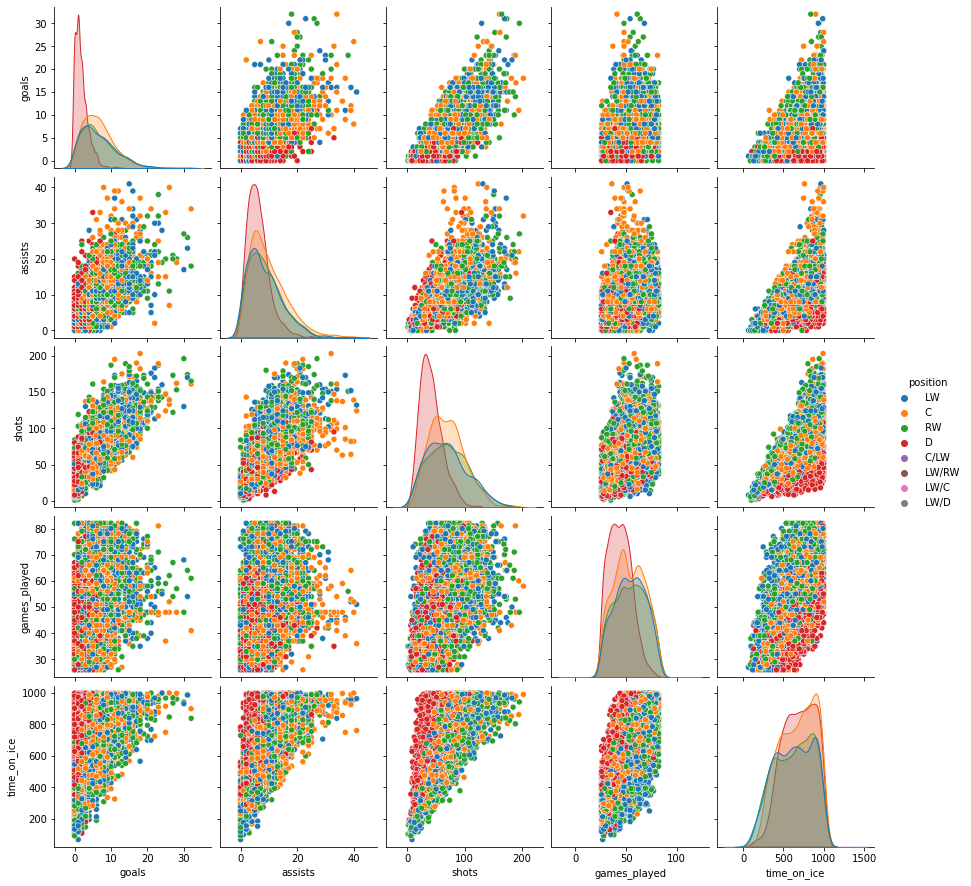

In [ ]:
sns.pairplot(df, hue='position', vars=['goals','assists','shots','games_played','time_on_ice'])

- Goals, Assets and Shots features have right skewed distribution where as time_on_ice and games_played features have almost normal distribution
- Also, Mixed positions are hardly played by any players

### 3.3.2 Heat map
- It plots a rectangular data as a color-encoded matrix
- This is an Axes-level function and will draw the heatmap into the currently-active Axes if none is provided to the ax argument

Lets check the correlation among numerical features using corr() function from pandas dataframe.
Also, we can use this corr() function values to  plot a map called "heatmap" for the same

In [ ]:
corr = df.corr()
corr

season       age  ...    blocks      hits
season           1.000000 -0.024527  ...  0.604037  0.612087
age             -0.024527  1.000000  ...  0.042303 -0.000961
games_played    -0.066537  0.100432  ...  0.029159  0.237571
goals            0.033427 -0.024277  ... -0.111499  0.040601
goals_per_game   0.056054 -0.049837  ... -0.131078 -0.028963
assists          0.013517  0.032985  ...  0.000382 -0.028588
points           0.024329  0.008871  ... -0.052958  0.001643
shots            0.084963 -0.037326  ... -0.010815  0.141753
shot_percentage -0.019449 -0.009285  ... -0.178639 -0.033533
time_on_ice      0.046921  0.095891  ...  0.297043  0.172212
blocks           0.604037  0.042303  ...  1.000000  0.542726
hits             0.612087 -0.000961  ...  0.542726  1.000000

[12 rows x 12 columns]

- Goals are highly correlated with goals_per_game, assets, points and shots
- Blocks are highly correlated with hits and season

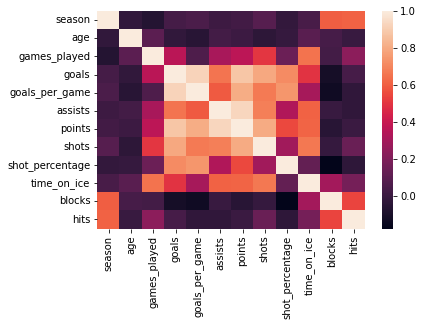

In [ ]:
sns.heatmap(corr)

### 3.3.3 Facet Grid

FacetGrid() : FacetGrid class helps in visualizing distribution of one variable as well as the relationship between multiple variables separately within subsets of your dataset using multiple panels.

How is the trend of geals for each season? Describe visually - Hint (Use sns.FacetGrid() & g.map() functions)



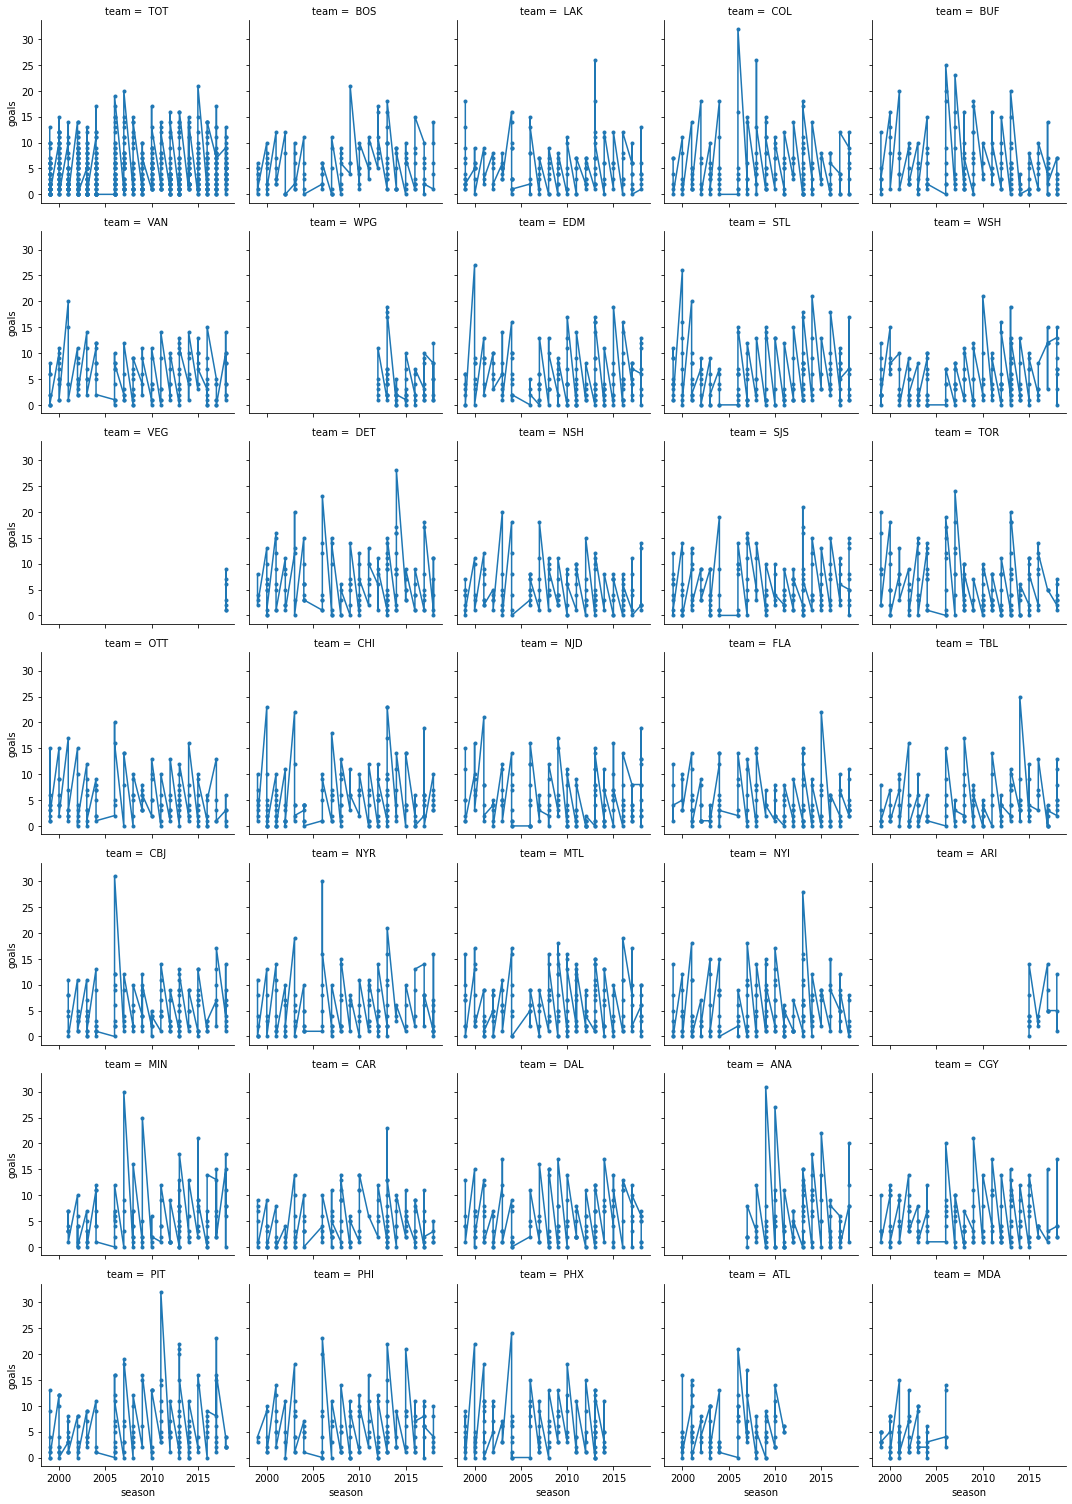

In [ ]:
g = sns.FacetGrid(df, col="team", col_wrap=5, height=3)
g = g.map(plt.plot, "season", "goals", marker=".")

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


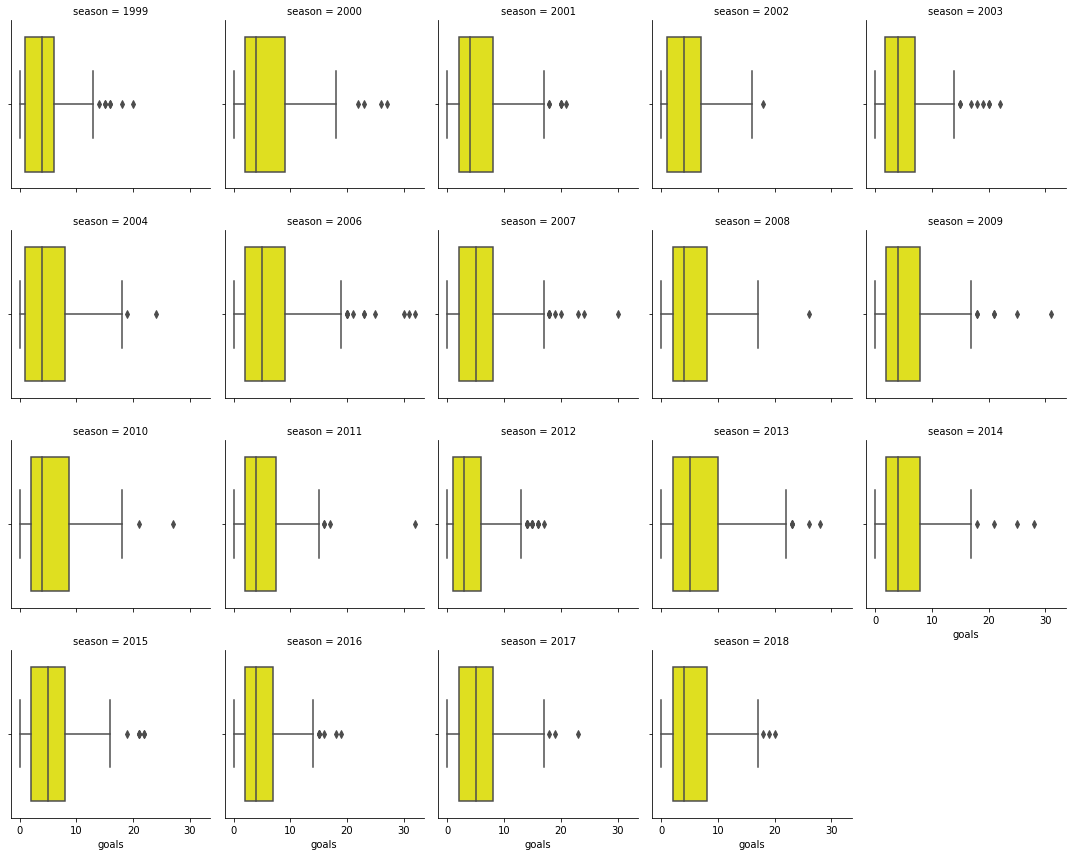

In [ ]:
a = sns.FacetGrid(df, col='season',col_wrap=5, height=3)
a.map(sns.boxplot, 'goals', color='yellow')

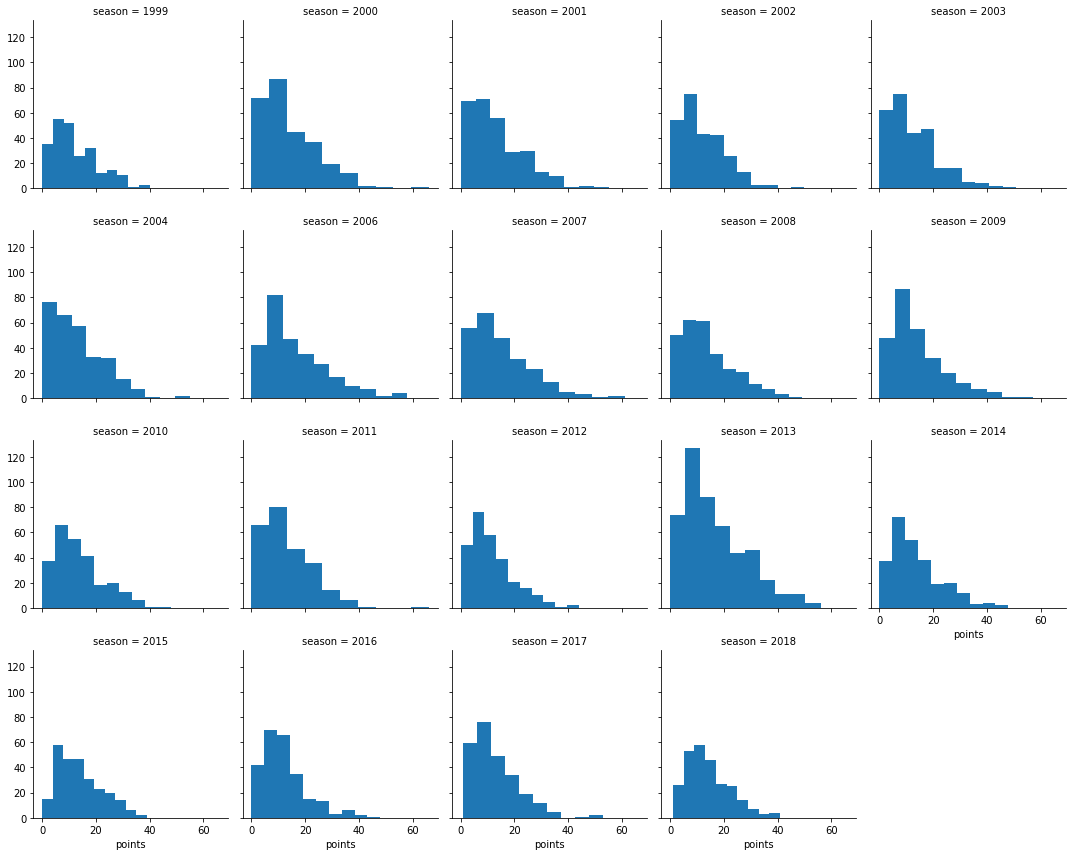

In [ ]:
import matplotlib.pyplot as plt
dt = df[['season','points']]
g = sns.FacetGrid(dt, col="season",col_wrap=5, height=3)
f = g.map(plt.hist, "points")

### 3.3.4 Plotly

In [ ]:
fig = px.scatter(x=df['team'], y=df['goals'], color=df['position'], animation_frame=df['season'])
fig.show()

If we just drag cursor to any one team, we can see how many goals that team scored in a perticular year(season) and also position of play.
For example : Team NSH scored 4 goals in 2016 with centre (C) position.

In [ ]:
# P - Scatter
import plotly.express as px
fig = px.scatter(x=df['player'], y=df['goals'], color=df['position'], animation_frame=df['season'])
fig.show()

If we just drag cursor to any one player, we can see how many goals he scored in a perticular year(season) and also his position of play.
For example : Matt Celvert scored 9 goals in 2018 when he played for left-wing (LW) position.

# **Happy Learning :)**

# The below topics are already covered in Faculty Session

## 3.1 Univariate Analysis: Analysis of a single variable
- Understand the feature, range, data type, scale, etc
- Understand the distribution of the feature. Is it normally distributed, skewed, or random (or has a misleading pattern)?
- Find out if the feature has any wrong or unusual pattern. Example - a user has age as 300 years. (We will discuss more on this in the next week)

#### How do we learn all of these things visually? 
#### Ans:- Plots gives us a very good idea about the range, distribution, etc.

#### Can we use the same plots for all kinds of features?
#### Ans:- No. A certain type of feature can be plotted using a certain kind of plot. Let's deep dive into it.

### 3.1.1 Continuous Feature

- Displot
  - Flexibly plot a univariate distribution of observations
- Histogram (Histplot)
  - Plot univariate or bivariate histograms to show distributions of datasets
  - A histogram is a classic visualization tool that represents the distribution of one or more variables by counting the number of observations that fall within disrete bins
- Box plot
  - A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable

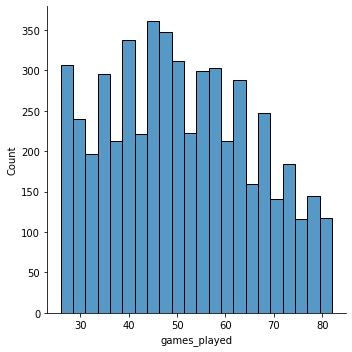

In [ ]:
# Analyze the spread of the "games_played" column

sns.displot(df["games_played"], kde=False)

### y axis is the count for each bin
### x is the actual bin of each year

- No clear pattern but close to normal distribution

________________________________________________________________________________

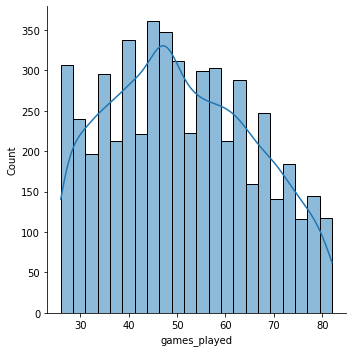

In [ ]:
### KDE IS KERNEL DENSITY ESTIMATOR
### GIVES THE DISTRIBUTION
### Y axis is the proportion of data and not count inside the kde line.
sns.displot(df["games_played"], kde=True)

This plot is similar to above displot and also shows kernel density estimator with normal distribution(but no clear pattern).

________________________________________________________________________________

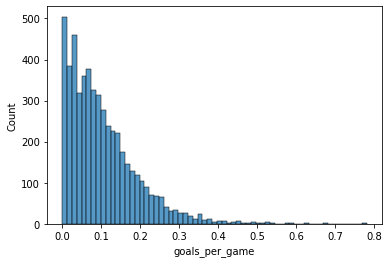

In [ ]:
sns.histplot(data=df, x="goals_per_game")

Distribution is slightly skewed towards right

________________________________________________________________________________

Lets check if there are any outliers present in data. Box plot helps in finding outliers.

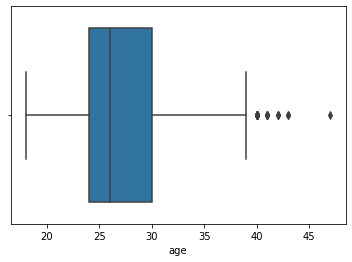

In [ ]:
ax = sns.boxplot(x=df["age"]) 

The median/mean age is 26. There are few outliers in age feature. We will discuss about outliers in next week

________________________________________________________________________________

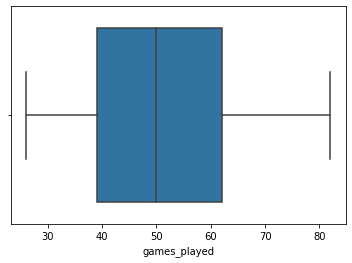

In [ ]:
ax = sns.boxplot(x=df["games_played"]) # There are no outliers in games_played feature

The median value of games_played feature is 50. There are no outliers in "games_played" feature

________________________________________________________________________________

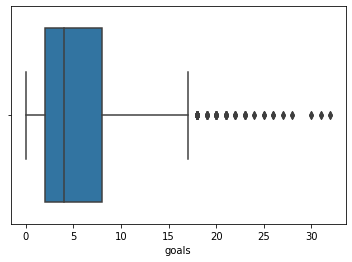

In [ ]:
ax = sns.boxplot(x=df["goals"]) 

The median value of goals scored is 4. There are many outliers in "goals" feature

________________________________________________________________________________

### 3.1.2 Categorical and Discrete Features

- Bar plot
  - A bar plot or bar chart is a graph that represents the category of data with rectangular bars with lengths and heights that is proportional to the values which they represent
  - The bar plots can be plotted horizontally or vertically
- Count plot
  - It shows the count of observations in each categorical bin using bars
  - The basic API and options are identical to those for barplot(), so you can compare counts across nested variables
- Pie plot
  - The pie chart draws one piece (called a wedge) for each value in the array
  - By default the plotting of the first wedge starts from the x-axis and move counterclockwise

How many matches were played in 2017 ?

In [ ]:
df['season'][df['season']== 2017].value_counts()  # count of season(year) 2017 is 257

2017    257
Name: season, dtype: int64

________________________________________________________________________________

#### In which year maximum matches were played? We can check using bar plot by pandas dataframe

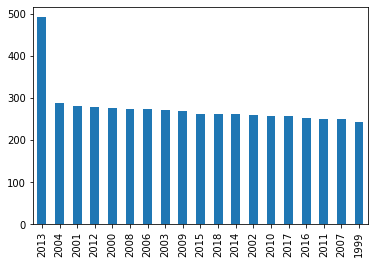

In [ ]:
df['season'].value_counts().plot.bar()  

It seems in 2013 maximum leagues were played approximately 490

_____________________________________________________________________________

#### What is the most common age of player and how many players of that age are present during 1999-2018 leagues data ?

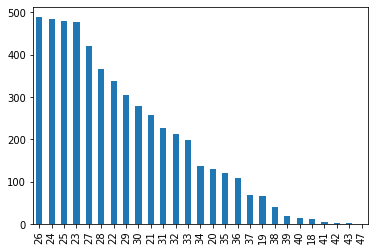

In [ ]:
df['age'].value_counts().plot.bar() 

Approximately 490 plyers are 26 years old

_______________________________________________________________________________

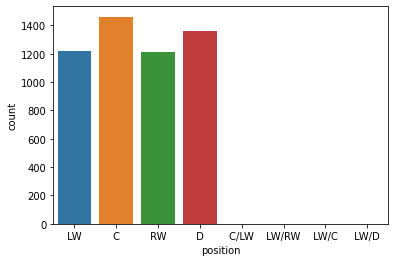

In [ ]:
ax = sns.countplot(x="position", data=df) 

Players only played on centre, right-wing, left-wing and deneseman positions. Almost no players played on mixed positions

___________________________________________________________________________

Total Number of Positions represented with Matplotlib Plotly Pie Chart Centers (C) have the highest number of positions filled with Defenseman (D) a close second. For the most part, all positions are evenly spread out. 

In [ ]:
#total number of players in each position
df['position'].count()
df['position'].value_counts()

5262

 C         1462
 D         1364
 LW        1217
 RW        1214
 C/LW         2
 LW/C         1
 LW/D         1
 LW/RW        1
Name: position, dtype: int64

Matplotlib plotly pie chart for visualization of total number of positions are represented
- Mixed positions left off for lack of significant numbers.

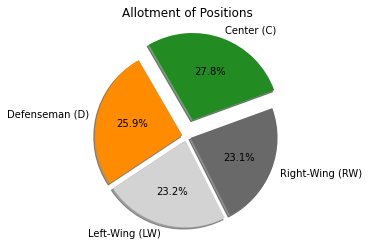

<Figure size 432x288 with 0 Axes>

In [ ]:
Positions = [1462,1364,1217,1214] #number of goals of each position in order from greatest to least

#labels for each portion of the pie. Mixed positions are left off for lack of significant numbers
my_labels = 'Center (C)','Defenseman (D)','Left-Wing (LW)','Right-Wing (RW)'

my_colors = ['forestgreen','darkorange','lightgray','dimgrey'] #colors assigned to maintain consistent color scheme throughout project
my_explode = (0.2, 0.05, 0.05, 0.05) #breaking off Center (C) piece of the pie for enhanced visualization of largest portion of positions

#putting the pie chart together from the variables created above
plt.pie(Positions, labels=my_labels, autopct='%1.1f%%', startangle=20, shadow = True, colors=my_colors, explode=my_explode) 
plt.title('Allotment of Positions') #assigned title of pie chart
plt.axis('equal') #scaling both axes equally for a perfectly round pie chart
plt.show() #displays the pie chart
plt.tight_layout();

## 3.2 Bivariate Analysis
- Bi means two and variate means variable, so here there are two variables. The analysis is related to cause and the relationship between the two features/variables
- Bivariate analysis can help determine to what extent it becomes easier to know and predict a value for one variable, if we know the value of the other variable
- There are three types of bivariate analysis :
  - Bivariate Analysis between Categorical and Continuous features
  - Bivariate Analysis between two Categorical features
  - Bivariate Analysis between two Continuous features
- Different plots for bivariate analysis :
  - Boxplot
  - Scatter plot
    - Draw a scatter plot with possibility of several semantic groupings
    - The relationship between x and y can be shown for different subsets of the data using the hue, size, and style parameters
  - Stripplot
    - It draws a scatterplot where one variable is categorical
    - A strip plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution
  - Voilin plot
    - Draw a combination of boxplot and kernel density estimate.
    - A violin plot plays a similar role as a box and whisker plot
    - It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared
    - Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution
  - Swarm plot
     - Draw a categorical scatterplot with non-overlapping points
     - This function is similar to stripplot(), but the points are adjusted (only along the categorical axis) so that they don’t overlap
     - This gives a better representation of the distribution of values, but it does not scale well to large numbers of observations. This style of plot is sometimes called a “beeswarm”
  - Line plot
    - Draw a line plot with possibility of several semantic groupings
    - The relationship between x and y can be shown for different subsets of the data using the hue, size, and style parameters
  - ggplot
    - ggplot2 is a plotting package that provides helpful commands to create complex plots from data in a data frame
    - ggplot2 refers to the name of the package itself. When using the package we use the function ggplot() to generate the plots, and so references to using the function will be referred to as ggplot() and the package as a whole as ggplot2
    - The + in the ggplot2 package is particularly useful because it allows you to modify existing ggplot objects
    - Syntax : ggplot(data = DATA, mapping = aes(MAPPINGS)) + GEOM_FUNCTION()
  - Cat plot
    - Figure-level interface for drawing categorical plots onto a FacetGrid
    - This function provides access to several axes-level functions that show the relationship between a numerical and one or more categorical variables using one of several visual representations

### 3.2.1 Between Continuous feature and Continuous feature

How is goals related to number of games played by different players ? 

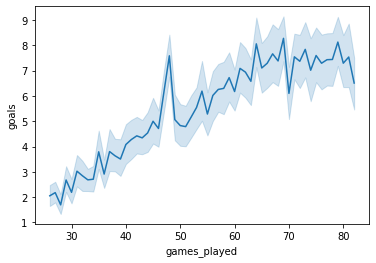

In [ ]:
sns.lineplot(x=df["games_played"], y=df["goals"], data=df)

Players who played more than 60 games shows significantly higher goals i.e. 8 where as shows less goals if they played less than 30 games

_____________________________________________________________________________

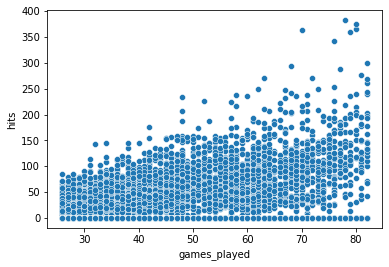

In [ ]:
sns.scatterplot(x=df["games_played"], y=df["hits"], data=df)

Maximum number of hits were observed during the range of 70-80 games being played

________________________________________________________________________________

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



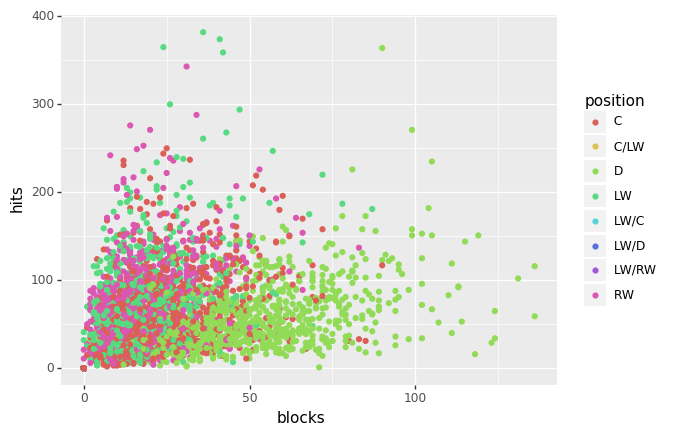

<ggplot: (8727654622453)>

In [ ]:
# ggplot
from plotnine import ggplot, aes, geom_line, geom_point

#ggplot(df, aes(x = "shots", y = "shot_percentage", colour="position")) + geom_point()
ggplot(df, aes(x = "blocks", y = "hits", colour="position")) + geom_point()

Maximum hits and blocks are below 300 and 100 respectively.

### 3.2.2 Between Categorical feature and Continuous feature

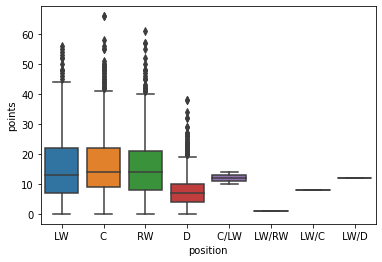

In [ ]:
sns.boxplot(x=df["position"], y=df["points"],data = df)

The median of points for Centre, Left-wing and Right-wing positions are almost same i.e. around 12-13 where as its less than 10 for Defendmen position

_____________________________________________________________________________

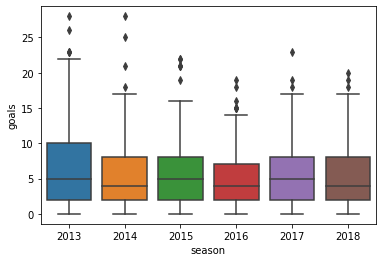

In [ ]:
sns.boxplot(x=df["season"][df["season"].isin([2018, 2017, 2016, 2015, 2014, 2013])], y=df["goals"], data=df)

Median goal for all seasons between 2013-2018 are approximately 5

Also, as we can see there are outliers present in many features. 
**NOTE :** We will learn about outliers and how to remove/reduce them in next session

___________________________________________________________________________

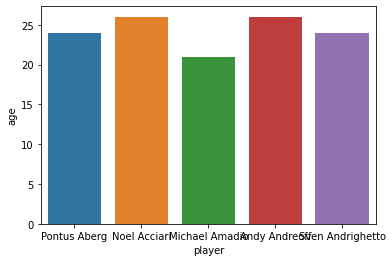

In [ ]:
sns.barplot(x= df["player"].head(5), y=df["age"], data=df)

Most of the players are of the age 26

_____________________________________________________________________________

###### We can also check no of goals per game during certain period say 1999-2003

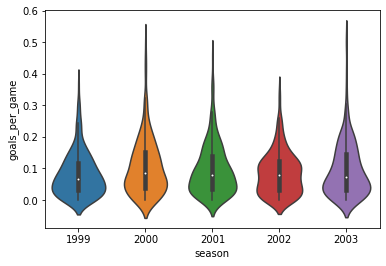

In [ ]:
ax = sns.violinplot(x=df["season"][df["season"].isin([1999, 2000, 2001, 2002, 2003])], y="goals_per_game", data=df)

Median goals_per_goal for all seasons between 1999-2003 are approximately 0.1

________________________________________________________________________________

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 37.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 34.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 37.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 41.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 35.7% of the points cannot be placed; y

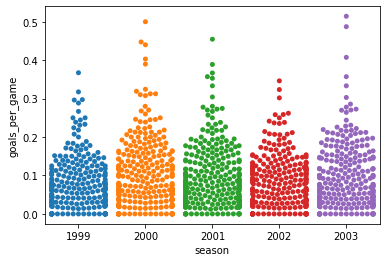

In [ ]:
ax = sns.swarmplot(x=df["season"][df["season"].isin([1999, 2000, 2001, 2002, 2003])], y="goals_per_game", data=df)

### 3.2.3 Between two Categorical features

In [ ]:
pd.crosstab(df['player'], df['position']).head(10) # there are few players who played from more than 1 position.
# For example :  Aaron Gavey played from centre as well as left-wing (LW) positions

position         C    C/LW    D    LW    LW/C    LW/D    LW/RW    RW 
player                                                               
Aaron Downey      0       0    0     0       0       0        0     5
Aaron Gavey       1       0    0     1       0       0        0     0
Aaron Johnson     0       0    7     0       0       0        0     0
Aaron Miller      0       0    2     0       0       0        0     0
Aaron Palushaj    0       0    0     0       0       0        0     1
Aaron Rome        0       0    4     0       0       0        0     0
Aaron Volpatti    0       0    0     1       0       0        0     1
Aaron Voros       0       0    0     3       0       0        0     0
Aaron Ward        0       0    3     0       0       0        0     0
Adam Burish       3       0    0     0       0       0        0     2

________________________________________________________________________________

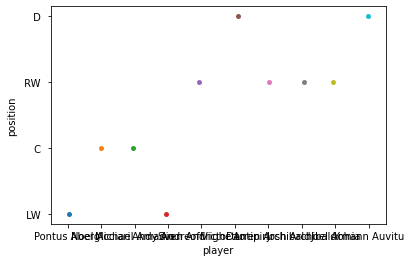

In [ ]:
ax = sns.stripplot(x=df["player"].head(10), y=df["position"], data=df) # reduce the head counter to see the names of the players

Players "Noel Acciari" and "Michael Amadio" played at the centre position

________________________________________________________________________________

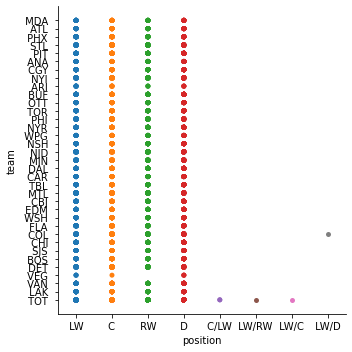

In [ ]:
sns.catplot(x="position", y="team", jitter=False, data=df)

For all the teams, there was no player who played for mixed  positions.